<a href="https://colab.research.google.com/github/xanasa14/ImagesCorruptioon/blob/master/2ImagesDifferences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!python -m pip install -U scikit-image[optional]
!pip install scikit-image==0.18.0

In [6]:
# import the necessary packages
from skimage import metrics
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
#drive.mount('/content/drive')

In [15]:
from PIL import Image

img = Image.open('/content/sample_data/image1.jpg')

img2 = Image.open('/content/sample_data/image2.jpg')



Nimg = img.resize((220,180))   # image resizing

Nimg2 = img2.resize((220,180))

Nimg.save('/content/sample_data/fin1.jpg')
Nimg2.save('/content/sample_data/fin2.jpg')



SSIM: 0.9340678235200316


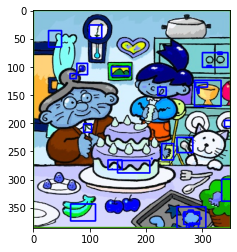

In [39]:
# load the two input images
imageA = cv2.imread('/content/sample_data/1left.jpg')
imageB = cv2.imread('/content/sample_data/1right.jpg')

# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned

(score, diff) = metrics.structural_similarity(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

# show the output images
plt.imshow(imageA,cmap='gray')          #cv2.imshow("Original", imageA)

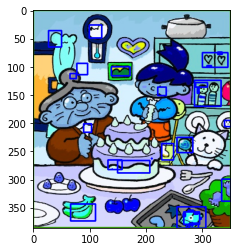

In [40]:
plt.imshow(imageB,cmap='gray')          #cv2.imshow("Modified", imageB)


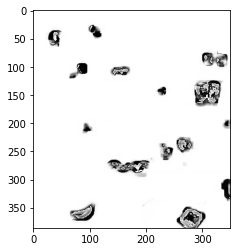

In [41]:
plt.imshow(diff,cmap='gray')            #cv2.imshow("Diff", diff)


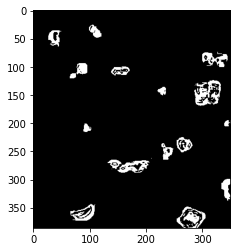

In [42]:
plt.imshow(thresh,cmap='gray')          #cv2.imshow("Thresh", thresh)


True

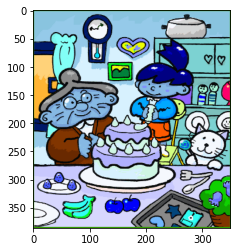

In [38]:
#WORKS!
import cv2
  
img = cv2.imread('/content/sample_data/Spot_the_difference.jpg')
  
# cv2.imread() -> takes an image as an input
h, w, channels = img.shape
  
half = w//2
  
  
# this will be the first column
left_part = img[:, :half] 
  
# [:,:half] means all the rows and
# all the columns upto index half
  
# this will be the second column
right_part = img[:, half:]  
  
# [:,half:] means al the rows and all
# the columns from index half to the end
# cv2.imshow is used for displaying the image
#plt.imshow('Left part', left_part)
#plt.imshow('Right part', right_part)

plt.imshow(right_part,cmap='gray')

# Save each half


cv2.imwrite('/content/sample_data/1left.jpg',left_part)
cv2.imwrite('/content/sample_data/1right.jpg',right_part)



In [17]:
# import module
from PIL import Image, ImageChops

# assign images
img1 = Image.open("/content/sample_data/image1.jpg")
img2 = Image.open("/content/sample_data/image1.jpg")

# finding difference
diff = ImageChops.difference(img1, img2)

# showing the difference
diff.show()


In [22]:
from PIL import ImageStat

In [25]:
def compare_images(img1, img2):
    """Calculate the difference between two images of the same size
    by comparing channel values at the pixel level.
    `delete_diff_file`: removes the diff image after ratio found
    `diff_img_file`: filename to store diff image

    Adapted from Nicolas Hahn:
    https://github.com/nicolashahn/diffimg/blob/master/diffimg/__init__.py
    """

    # Don't compare if images are of different modes or different sizes.
    if (img1.mode != img2.mode) \
            or (img1.size != img2.size) \
            or (img1.getbands() != img2.getbands()):
        return None

    # Generate diff image in memory.
    diff_img = ImageChops.difference(img1, img2)
    # Calculate difference as a ratio.
    stat = ImageStat.Stat(diff_img)
    diff_ratio = sum(stat.mean) / (len(stat.mean) * 255)

    return diff_ratio * 100 

compare_images(img1,img2)

0.0

In [15]:
diff.show()
